In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import warnings         
warnings.filterwarnings("ignore")


In [2]:
dfe = pd.read_csv("dataset/resampled-train.csv")

In [3]:
X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

y_resampled = dfe['Price_Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


K: 2, Inertia: 152627.0124532181
K: 3, Inertia: 109508.16087658494
K: 4, Inertia: 94364.39783158904
K: 5, Inertia: 80564.21754596208
K: 6, Inertia: 70937.49655479578
K: 7, Inertia: 58952.253684731935
K: 8, Inertia: 50850.94123700401
K: 9, Inertia: 45564.769607003764
K: 10, Inertia: 40592.31114699077


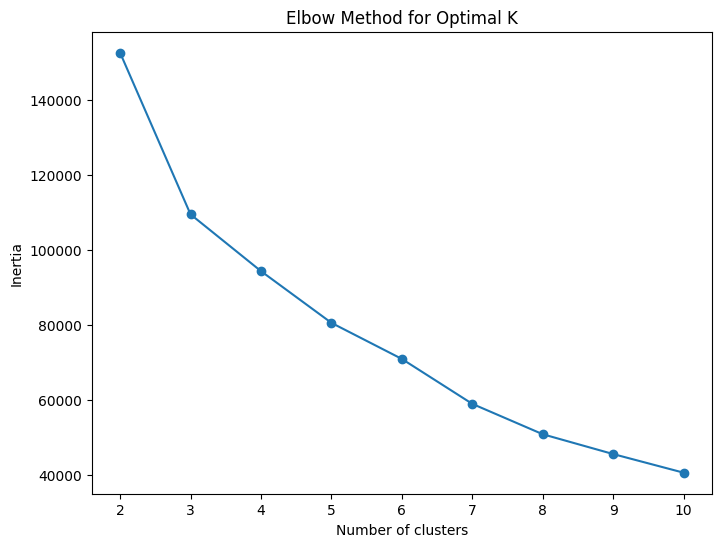

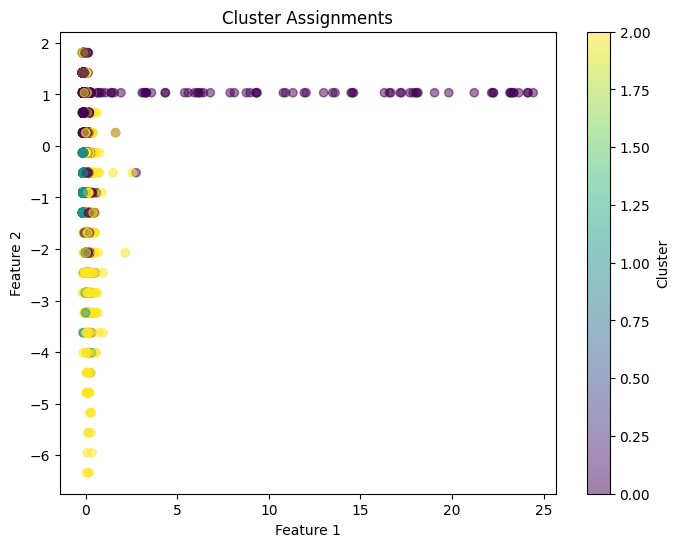

K: 2, Silhouette Score: 0.3852121962982388
K: 3, Silhouette Score: 0.4135465533402157
K: 4, Silhouette Score: 0.4401540543091585
K: 5, Silhouette Score: 0.44311401505066816
K: 6, Silhouette Score: 0.44950179576002325
K: 7, Silhouette Score: 0.4586266805719236
K: 8, Silhouette Score: 0.399278003620005
K: 9, Silhouette Score: 0.42896590598878126
K: 10, Silhouette Score: 0.44413741927739364


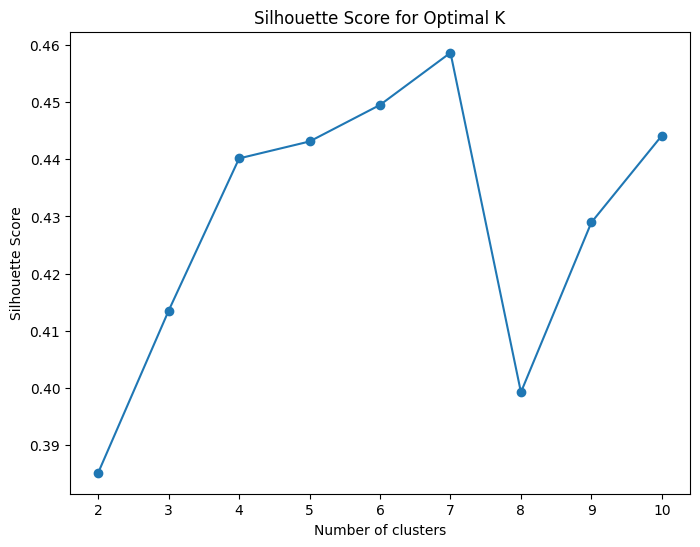

Test Set Metrics:
Confusion Matrix:
[[1797    1    3]
 [   1  779    1]
 [   4    0  855]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1801
           1       1.00      1.00      1.00       781
           2       1.00      1.00      1.00       859

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441


Accuracy: 0.99709386806161


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_train = kmeans.fit_predict(X_train_scaled)
clusters_test = kmeans.predict(X_test_scaled)

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

for k, inertia_val in zip(range(2, 11), inertia):
    print(f'K: {k}, Inertia: {inertia_val}')

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters_train, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Assignments')
plt.colorbar(label='Cluster')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_scaled, labels))

for k, silhouette_val in zip(range(2, 11), silhouette_scores):
    print(f'K: {k}, Silhouette Score: {silhouette_val}')

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, clusters_train)

best_params = grid_search.best_params_

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, clusters_train)

knn_clusters_test = best_knn.predict(X_test_scaled)


# Compute metrics
conf_matrix_test = confusion_matrix(clusters_test, knn_clusters_test)
classification_rep_test = classification_report(clusters_test, knn_clusters_test)
accuracy_test = accuracy_score(clusters_test, knn_clusters_test)

print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(classification_rep_test)
print("\nAccuracy:", accuracy_test)
